In [156]:
# ! pip install geopandas
# ! pip install PIL

In [157]:
# import matplotlib.patches as patches
# import supervision as sv

import sys
import numpy as np
import glob
import os
import bz2
import pandas as pd
import geopandas as gpd
import pickle
# from PIL import Image
# import street_triangulation as tri
# import supervision as sv
import cv2
import math
import pdb
# import contextily as ctx
from matplotlib.colors import ListedColormap
# import matplotlib.patches as patches
import matplotlib.pyplot as plt



pd.set_option('display.max_columns', None)

sys.path.append(r'E:\Research\StreetView\gsv_pano')  # 2018
# sys.path.append(r'D:\Research\StreetView\gsv_pano')  # Dell

from pano import GSV_pano
import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load results

In [158]:
ground_truth_file = r"F:\OneDrive_Emory\OneDrive - Emory\Research_doc\street_image_mapping\Python_code\experiment_data\Heyward_St_ground_truth\ground_truth_trunk_Heyward.shp"
estimate_file = r"F:\OneDrive_Emory\OneDrive - Emory\Research_doc\street_image_mapping\Python_code\experiment_data\Heyward_st_trunks\localized_trunks.shp"

In [159]:
SVI_gdf = gpd.read_file(estimate_file)
SVI_gdf

,index,distance,root_cente,root_botto,azimuth_ra,altitude_r,depth_h_di,median_wid,median_w_1,median_row,median_r_1,panoID,depth_x,depth_y,pano_x,pano_y,pano_headi,thumbnail_,trunk_head,image_file,azimuth_de,Type,h_distance,vertex_ang,pano_hea_1,tri_x,tri_y,left_col,right_col,diameter,geometry
0,1,14.700000,272,477,-0.438337,-0.163009,14.505129,59.0,438,250,308,-apTLrvpSNEjvG8b5eWZ2A,609258.869246,239239.071973,609245.573759,239244.871005,93.675537,138.68,113.565165,-apTLrvpSNEjvG8b5eWZ2A_0.0_0.0_0_138.68_R45.jpg,-25.114835,trunk,14.273569,19.667530,1.634947,609258.656997,239239.164549,242.5,301.5,1.347659,POINT (609258.657 239239.165)
1,0,4.822246,233,669,-0.498936,-0.454633,4.332413,195.0,530,151,345,k5-O4GqXpRuptfifbbEKiA,609258.165025,239240.214943,609256.327428,239244.138339,93.485245,183.49,154.903067,k5-O4GqXpRuptfifbbEKiA_0.0_0.0_0_183.49_R90.jpg,-28.586933,trunk,5.492311,118.994568,1.631625,609258.656997,239239.164549,135.5,330.5,1.605610,POINT (609258.657 239239.165)
2,0,6.707345,998,592,0.759352,-0.286538,6.433874,49.0,493,975,1023,-apTLrvpSNEjvG8b5eWZ2A,609240.853975,239240.498549,609245.573759,239244.871005,93.675537,183.68,227.187662,-apTLrvpSNEjvG8b5eWZ2A_0.0_0.0_0_183.68_R90.jpg,43.507662,trunk,6.958948,133.290027,1.634947,609240.468789,239240.141709,973.5,1022.5,0.350424,POINT (609240.469 239240.142)
3,0,16.118631,777,454,0.477611,-0.120828,16.001113,25.0,420,765,789,k5-O4GqXpRuptfifbbEKiA,609240.811456,239240.228066,609256.327428,239244.138339,93.485245,228.49,255.855095,k5-O4GqXpRuptfifbbEKiA_0.0_0.0_0_228.49_R135.jpg,27.365095,trunk,16.354494,18.042540,1.631625,609240.468789,239240.141709,764.5,789.5,0.629780,POINT (609240.469 239240.142)
4,0,11.540379,536,510,0.046841,-0.241044,11.206738,26.0,448,524,549,-apTLrvpSNEjvG8b5eWZ2A,609246.815920,239256.008689,609245.573759,239244.871005,93.675537,3.68,6.363775,-apTLrvpSNEjvG8b5eWZ2A_0.0_0.0_0_3.68_L90.jpg,2.683775,trunk,9.464319,87.533860,1.634947,609246.622790,239254.277007,523.0,549.0,0.479403,POINT (609246.623 239254.277)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,14.193171,563,480,0.099282,-0.184456,13.952401,21.0,433,553,573,c_EHRnqMlsR0KzHFaBKF2g,608960.463556,239278.898329,608968.562102,239267.536857,93.827950,318.83,324.518433,c_EHRnqMlsR0KzHFaBKF2g_0.0_0.0_0_318.83_L135.jpg,5.688433,trunk,11.873495,50.039101,1.637607,608961.670239,239277.205471,552.5,573.5,0.482117,POINT (608961.670 239277.205)
634,0,10.437975,193,527,-0.557194,-0.232755,10.156511,33.0,456,177,209,ykx80oWPZZxJRj3fO4aDSQ,608961.892806,239278.025219,608959.015823,239268.284701,93.383476,48.38,16.455159,ykx80oWPZZxJRj3fO4aDSQ_0.0_0.0_0_48.38_L45.jpg,-31.924841,trunk,9.321979,78.024172,1.629849,608961.656412,239277.224868,176.5,209.5,0.432791,POINT (608961.656 239277.225)
635,0,14.193171,563,480,0.099282,-0.184456,13.952401,21.0,433,553,573,c_EHRnqMlsR0KzHFaBKF2g,608960.463556,239278.898329,608968.562102,239267.536857,93.827950,318.83,324.518433,c_EHRnqMlsR0KzHFaBKF2g_0.0_0.0_0_318.83_L135.jpg,5.688433,trunk,11.897315,50.039101,1.637607,608961.656412,239277.224868,552.5,573.5,0.483084,POINT (608961.656 239277.225)
636,0,10.437975,193,527,-0.557194,-0.232755,10.156511,33.0,456,177,209,ykx80oWPZZxJRj3fO4aDSQ,608961.892806,239278.025219,608959.015823,239268.284701,93.383476,48.38,16.455159,ykx80oWPZZxJRj3fO4aDSQ_0.0_0.0_0_48.38_L45.jpg,-31.924841,trunk,9.308567,78.024172,1.629849,608961.652613,239277.212005,176.5,209.5,0.432168,POINT (608961.653 239277.212)


In [160]:
GT_gdf = gpd.read_file(ground_truth_file).sort_values('created_at').reset_index()


# remove problematic image or trees
GT_gdf = GT_gdf.query("ec5_uuid != 'e8d995e2-57f3-440f-81ae-d2bc4dcbb837' ")
GT_gdf = GT_gdf.query("ec5_uuid != '189b47b6-fe34-4d3f-865f-f5958b7422e2' ")
GT_gdf = GT_gdf.query("ec5_uuid != 'fd44a744-a61c-437b-9e72-999622f00534' ")
GT_gdf = GT_gdf.query("ec5_uuid != '944d1310-12a8-4b9e-8654-2057f9cb9559' ")
GT_gdf = GT_gdf.query("ec5_uuid != '0d1177f7-d010-4ed8-b6af-f49b636863fd' ")
GT_gdf = GT_gdf.query("ec5_uuid != 'e6d5759f-003d-4a38-beb3-274bd773a8f2' ")
GT_gdf = GT_gdf.query("ec5_uuid != '18ab0b3b-33c4-4681-9f78-6d93c4255931' ")   # ??:?
GT_gdf = GT_gdf.query("ec5_uuid != '0109cf53-31aa-4406-aff9-97771900be1e' ")   # ??

GT_gdf = GT_gdf.reset_index()
GT_gdf

,level_0,index,ec5_uuid,created_at,uploaded_a,lon,lat,accuracy,raw_measur,diameter_m,photo,GSV_dia,folder2,Field,Field1,geometry
0,0,90,24763d55-4d76-498b-af6d-22d2799bb33a,2024-08-03T13:20:44.000Z,2024-08-03T15:21:08.000Z,-81.009828,33.991364,2,9-0,0.873188,24763d55-4d76-498b-af6d-22d2799bb33a_172269123...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00984 33.99121)
1,1,89,2254e854-3810-4374-9b8c-6df15bd4775f,2024-08-03T13:22:22.000Z,2024-08-03T15:21:10.000Z,-81.009753,33.991293,3,5-2,0.501275,2254e854-3810-4374-9b8c-6df15bd4775f_172269133...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00971 33.99120)
2,4,86,7eda123b-653b-4a20-98ec-ed68650783be,2024-08-03T13:27:15.000Z,2024-08-03T15:21:22.000Z,-81.009136,33.991180,3,0-11,0.088936,7eda123b-653b-4a20-98ec-ed68650783be_172269163...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00928 33.99117)
3,5,85,95f65adc-a6c1-494a-9e2f-7619fb7daff1,2024-08-03T13:28:57.000Z,2024-08-03T15:21:27.000Z,-81.009180,33.991195,2,9-6,0.921699,95f65adc-a6c1-494a-9e2f-7619fb7daff1_172269173...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00914 33.99117)
4,6,84,81dd72c0-dd3e-4863-a98b-07c4c79f4b57,2024-08-03T13:30:59.000Z,2024-08-03T15:21:32.000Z,-81.009052,33.991230,2,2-11,0.282978,81dd72c0-dd3e-4863-a98b-07c4c79f4b57_172269185...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00905 33.99115)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,85,5,acddebd5-fab4-48b4-8a29-89a8317a3517,2024-08-03T15:09:29.000Z,2024-08-03T15:26:47.000Z,-81.008578,33.990999,2,2-2,0.210212,acddebd5-fab4-48b4-8a29-89a8317a3517_172269776...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00857 33.99098)
79,86,4,21179720-ae03-4a12-b751-ae49278b1dc9,2024-08-03T15:10:43.000Z,2024-08-03T15:26:52.000Z,-81.008814,33.990955,3,7-0,0.679147,21179720-ae03-4a12-b751-ae49278b1dc9_172269784...,0.00,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (-81.00876 33.99100)
80,87,3,4e91d6d3-e0f1-47eb-bc97-8836cbc89aab,2024-08-03T15:12:23.000Z,2024-08-03T15:26:57.000Z,-81.009415,33.991031,3,3-1,0.299148,4e91d6d3-e0f1-47eb-bc97-8836cbc89aab_172269794...,0.29,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,0.0,0.0,POINT (-81.00939 33.99103)
81,89,1,f4e9ae46-5436-4550-b0ea-c12b80ec3947,2024-08-03T15:13:59.000Z,2024-08-03T15:27:07.000Z,-81.009721,33.991076,3,1-11,0.185957,f4e9ae46-5436-4550-b0ea-c12b80ec3947_172269803...,0.15,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,0.0,0.0,POINT (-81.00971 33.99106)


In [161]:
GT_gdf.explore()

In [162]:
# GT_gdf.loc[0, 'accuracy'] = 1000
# GT_gdf

In [163]:
import geopandas as gpd
from shapely.geometry import Point, box
import pandas as pd
# pd.set_option('display.max_colwidth', None) # Prevent truncation of column values
# pd.set_option('display.width', 1000)        # Set the display width to 1000 characters (adjust as needed)


def find_nearest_points_within_threshold(points_gdf, other_points_gdf, threshold):
    """
    For each point in `points_gdf`, find the nearest point in `other_points_gdf` within a distance threshold.
    
    Parameters:
    points_gdf (GeoDataFrame): GeoDataFrame containing the points to check.
    other_points_gdf (GeoDataFrame): GeoDataFrame containing the points to search from.
    threshold (float): Distance threshold within which to find the nearest point (in the same CRS as the GeoDataFrames).
    
    Returns:
    GeoDataFrame: A new GeoDataFrame with the original points and columns for the nearest point geometry and distance.
    """
    points_gdf['mean_diameter'] = -1.0
    points_gdf['used_mean_distance'] = -1.0
    points_gdf['measure_cnt'] = 0
    points_gdf['used_measure_cnt'] = 0
    # Ensure both GeoDataFrames have the same CRS
    if points_gdf.crs != other_points_gdf.crs:
        other_points_gdf = other_points_gdf.to_crs(points_gdf.crs)
    
    # Build a spatial index for the other points
    sindex = other_points_gdf.sindex

    # Initialize lists to store results
    nearest_points = []
    distances = []
    used_df_list = []

    # Iterate through each point in points_gdf
    for idx, point in enumerate(points_gdf.geometry):
        # print("ec5_uuid point:",idx, points_gdf.loc[idx, 'ec5_uuid'], point)
        # print("point.buffer(threshold).bounds):", point.buffer(threshold).bounds, box(*point.buffer(threshold).bounds))
        # Query the spatial index for possible matches within the threshold
        possible_matches_index = list(sindex.query(box(*point.buffer(threshold).bounds)))
        # print("point:", point)
        possible_matches = other_points_gdf.iloc[possible_matches_index]
        # print("possible_matches:", possible_matches)

        if not possible_matches.empty:
            # Filter further by checking actual distance to the point
            possible_matches = possible_matches[possible_matches.distance(point) <= threshold]
            points_gdf.loc[idx, 'measure_cnt'] =  len(possible_matches)
            mean_diameter, used_df = average_multi_measures(possible_matches)

            

            if mean_diameter > 0:
                # print("len(used_df):", used_df)
    
                points_gdf.loc[idx, 'used_measure_cnt'] =  len(used_df)
                points_gdf.loc[idx, 'mean_diameter'] =  mean_diameter
     
                points_gdf.loc[idx, 'used_mean_distance'] =  used_df['distance'].mean()

                used_df['ec5_uuid'] = points_gdf.loc[idx, 'ec5_uuid']

                used_df['field_diameter_m'] = points_gdf.loc[idx, 'diameter_m']
                # used_df['SVI_diameter'] = points_gdf.loc[idx, 'diameter']
                used_df['mean_diameter'] = mean_diameter

                used_df['error'] = used_df['mean_diameter'] - used_df['field_diameter_m'] 
                used_df['error_abs'] = used_df['error'].abs()
                used_df['error_%'] = used_df['error_abs'] / used_df['field_diameter_m']

                used_df_list.append(used_df)
                
        
    return points_gdf, used_df_list

def average_multi_measures(df, edge_pix = 5, img_width=1024, dis_factor=1.5):
    # compute the final tree diameters from the selected measures from street view images
    # Rules: 1) use the nearest image, and those not more far away than 50% distance of the nearest. 
    # 2) not close to the right/left most edge.
    df = df.query(f"left_col > {edge_pix}").query(f"right_col < {img_width - edge_pix}")
    df = df.sort_values('distance')
    # used_cnt = 0

    mean_diameter = 0

    used_df = None

    if not df.empty:
        nearest_dis = df.iloc[0]['distance']
        # used_df = df.query(f"distance < {nearest_dis * dis_factor}")
        used_df = df.query(f"distance < 20")
        mean_diameter = used_df.iloc[:]['diameter'].mean()  # select 4 at most
        # used_cnt = len(df)
    
    return mean_diameter, used_df

added_estimated_gdf, used_df_list = find_nearest_points_within_threshold(GT_gdf.to_crs(6569), SVI_gdf.to_crs(6569), 3)  # EPSG: 6569, South Carolina
# df_list[0]#.sort_values('distance')[['distance', 'diameter']]
# gdf.query("mean_diameter > 0")[['diameter_m', 'mean_diameter']]['mean_diameter']
pd.concat(used_df_list).to_csv(r"merged_results.csv", index=False)
# used_df_list[2]

In [164]:
# used_df_list
len(added_estimated_gdf.query("mean_diameter > 0") )

59

In [165]:
added_estimated_gdf.explore()

In [166]:
# load previous South Harden St results
SH_results_file = r"F:\OneDrive_Emory\OneDrive - Emory\Research_doc\street_image_mapping\Python_code\experiment_data\South_Harden_St_ground_truth\South_harden_results.csv"
SH_results_df = pd.read_csv(SH_results_file).rename(columns={'estimated':'mean_diameter', 'ground truth':'diameter_m'})
SH_results_df

,diameter_m,mean_diameter
0,0.38,0.38
1,0.42,0.42
2,0.85,0.86
3,0.44,0.43
4,0.70,0.68
5,0.29,0.30
6,0.72,0.75
7,0.88,0.92
8,1.03,1.08
9,0.78,0.82


In [167]:
added_estimated_gdf = pd.concat([added_estimated_gdf, SH_results_df], ignore_index=True)
# 
len(added_estimated_gdf.query("mean_diameter > 0") )

e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as NAD83(2011) / South Carolina (the single non-null crs provided).
  warnings.warn(


84

In [168]:
# compute the estimated diameter
added_estimated_gdf['error'] = added_estimated_gdf['mean_diameter'] - added_estimated_gdf['diameter_m']
added_estimated_gdf['error_abs'] = added_estimated_gdf['error'].abs()
added_estimated_gdf['error_%'] = added_estimated_gdf['error_abs'] / added_estimated_gdf['diameter_m']


added_estimated_gdf.query("mean_diameter > 0")['error_abs'].mean()# [['diameter_m', 'mean_diameter']]#['mean_diameter']
added_estimated_gdf.query("mean_diameter > 0")['error_%'].mean(), added_estimated_gdf.query("mean_diameter > 0")['error_abs'].mean()

(0.07393549734032209, 0.04102044138270161)

In [169]:
added_estimated_gdf.query("mean_diameter > 0")['error_%'].median(), added_estimated_gdf.query("mean_diameter > 0")['error_abs'].median()

(0.06666394701393674, 0.030000000000000027)

In [170]:
# compute the  Standard Deviation of the Errors 
added_estimated_gdf.query("mean_diameter > 0")['error_%'].std(), added_estimated_gdf.query("mean_diameter > 0")['error_abs'].std()

(0.05400751545945992, 0.03804034844613062)

In [171]:
len(added_estimated_gdf.query("mean_diameter > 0").copy())

84

In [172]:
# Perform paired t-tests to compare SIM measurements vs ground truth
from scipy import stats

# Filter data with valid measurements
valid_data = added_estimated_gdf.query("mean_diameter > 0").copy()
print(len(valid_data), " valid data points for comparison.")

print("="*60)
print("STATISTICAL TESTS: SIM vs Ground Truth")
print("="*60)

# 1. Paired t-test for diameter measurements
diameter_ttest = stats.ttest_rel(valid_data['mean_diameter'], valid_data['diameter_m'])
print(f"\n1. DIAMETER COMPARISON (Paired t-test)")
print(f"   Sample size: n = {len(valid_data)}")
print(f"   Ground truth mean: {valid_data['diameter_m'].mean():.4f} m")
print(f"   SIM estimated mean: {valid_data['mean_diameter'].mean():.4f} m")
print(f"   t-statistic: {diameter_ttest.statistic:.4f}")
print(f"   p-value: {diameter_ttest.pvalue:.4f}")
if diameter_ttest.pvalue < 0.05:
    print(f"   Result: SIGNIFICANT difference (p < 0.05)")
else:
    print(f"   Result: NO significant difference (p >= 0.05)")

# # 2. Extract x, y coordinates for location comparison
# # Ground truth coordinates (already in projected CRS 6569)
# gt_x = valid_data.geometry.x.values
# gt_y = valid_data.geometry.y.values

# # For estimated coordinates, we need to match with SVI_gdf using spatial join
# # The 'tri_x' and 'tri_y' in SVI_gdf are the triangulated coordinates
# # Since added_estimated_gdf was created by matching GT to SVI, we need to get the matched SVI coords

# # Re-perform spatial matching to get estimated coordinates
# from shapely.geometry import box

# SVI_gdf_proj = SVI_gdf.to_crs(6569)
# threshold = 3  # meters

# est_x_list = []
# est_y_list = []
# for idx, row in valid_data.iterrows():
#     point = row.geometry
#     # Find matching SVI points within threshold
#     sindex = SVI_gdf_proj.sindex
#     possible_matches_index = list(sindex.query(box(*point.buffer(threshold).bounds)))
#     possible_matches = SVI_gdf_proj.iloc[possible_matches_index]
#     possible_matches = possible_matches[possible_matches.distance(point) <= threshold]
    
#     if not possible_matches.empty:
#         # Use the mean of triangulated coordinates from matched points
#         est_x_list.append(possible_matches['tri_x'].mean())
#         est_y_list.append(possible_matches['tri_y'].mean())
#     else:
#         est_x_list.append(np.nan)
#         est_y_list.append(np.nan)

# valid_data['est_x'] = est_x_list
# valid_data['est_y'] = est_y_list
# valid_data['gt_x'] = gt_x
# valid_data['gt_y'] = gt_y

# # Filter out any rows with NaN coordinates
# coord_valid = valid_data.dropna(subset=['est_x', 'est_y'])

# print(f"\n2. LOCATION (X-COORDINATE) COMPARISON (Paired t-test)")
# print(f"   Sample size: n = {len(coord_valid)}")
# x_ttest = stats.ttest_rel(coord_valid['est_x'], coord_valid['gt_x'])
# print(f"   Ground truth X mean: {coord_valid['gt_x'].mean():.2f} m")
# print(f"   SIM estimated X mean: {coord_valid['est_x'].mean():.2f} m")
# print(f"   Mean difference: {(coord_valid['est_x'] - coord_valid['gt_x']).mean():.4f} m")
# print(f"   t-statistic: {x_ttest.statistic:.4f}")
# print(f"   p-value: {x_ttest.pvalue:.4f}")
# if x_ttest.pvalue < 0.05:
#     print(f"   Result: SIGNIFICANT difference (p < 0.05)")
# else:
#     print(f"   Result: NO significant difference (p >= 0.05)")

# print(f"\n3. LOCATION (Y-COORDINATE) COMPARISON (Paired t-test)")
# y_ttest = stats.ttest_rel(coord_valid['est_y'], coord_valid['gt_y'])
# print(f"   Ground truth Y mean: {coord_valid['gt_y'].mean():.2f} m")
# print(f"   SIM estimated Y mean: {coord_valid['est_y'].mean():.2f} m")
# print(f"   Mean difference: {(coord_valid['est_y'] - coord_valid['gt_y']).mean():.4f} m")
# print(f"   t-statistic: {y_ttest.statistic:.4f}")
# print(f"   p-value: {y_ttest.pvalue:.4f}")
# if y_ttest.pvalue < 0.05:
#     print(f"   Result: SIGNIFICANT difference (p < 0.05)")
# else:
#     print(f"   Result: NO significant difference (p >= 0.05)")

# # 3. Euclidean distance between GT and estimated locations
# coord_valid['location_error'] = np.sqrt((coord_valid['est_x'] - coord_valid['gt_x'])**2 + 
#                                          (coord_valid['est_y'] - coord_valid['gt_y'])**2)

# print(f"\n4. EUCLIDEAN DISTANCE ERROR (Location accuracy)")
# print(f"   Mean distance error: {coord_valid['location_error'].mean():.4f} m")
# print(f"   Median distance error: {coord_valid['location_error'].median():.4f} m")
# print(f"   Std deviation: {coord_valid['location_error'].std():.4f} m")
# print(f"   Max error: {coord_valid['location_error'].max():.4f} m")

# # One-sample t-test: Is mean location error significantly different from 0?
# loc_ttest = stats.ttest_1samp(coord_valid['location_error'], 0)
# print(f"   One-sample t-test (H0: mean error = 0):")
# print(f"   t-statistic: {loc_ttest.statistic:.4f}, p-value: {loc_ttest.pvalue:.6f}")

# print("\n" + "="*60)
# print("SUMMARY")
# print("="*60)
# print(f"Diameter: p = {diameter_ttest.pvalue:.4f} -> {'Significant' if diameter_ttest.pvalue < 0.05 else 'Not significant'}")
# print(f"X-coord:  p = {x_ttest.pvalue:.4f} -> {'Significant' if x_ttest.pvalue < 0.05 else 'Not significant'}")
# print(f"Y-coord:  p = {y_ttest.pvalue:.4f} -> {'Significant' if y_ttest.pvalue < 0.05 else 'Not significant'}")

84  valid data points for comparison.
STATISTICAL TESTS: SIM vs Ground Truth

1. DIAMETER COMPARISON (Paired t-test)
   Sample size: n = 84
   Ground truth mean: 0.5641 m
   SIM estimated mean: 0.5558 m
   t-statistic: -1.3586
   p-value: 0.1779
   Result: NO significant difference (p >= 0.05)


In [173]:
added_estimated_gdf = added_estimated_gdf.query("mean_diameter > 0")#.plot.scatter('diameter_m', 'mean_diameter')
added_estimated_gdf

,level_0,index,ec5_uuid,created_at,uploaded_a,lon,lat,accuracy,raw_measur,diameter_m,photo,GSV_dia,folder2,Field,Field1,geometry,mean_diameter,used_mean_distance,measure_cnt,used_measure_cnt,error,error_abs,error_%
0,0.0,90.0,24763d55-4d76-498b-af6d-22d2799bb33a,2024-08-03T13:20:44.000Z,2024-08-03T15:21:08.000Z,-81.009828,33.991364,2.0,9-0,0.873188,24763d55-4d76-498b-af6d-22d2799bb33a_172269123...,0.0,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (608690.860 239300.190),0.865444,12.588863,18.0,8.0,-0.007745,0.007745,0.008869
1,1.0,89.0,2254e854-3810-4374-9b8c-6df15bd4775f,2024-08-03T13:22:22.000Z,2024-08-03T15:21:10.000Z,-81.009753,33.991293,3.0,5-2,0.501275,2254e854-3810-4374-9b8c-6df15bd4775f_172269133...,0.0,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (608702.801 239298.965),0.457290,13.989218,6.0,5.0,-0.043985,0.043985,0.087746
3,5.0,85.0,95f65adc-a6c1-494a-9e2f-7619fb7daff1,2024-08-03T13:28:57.000Z,2024-08-03T15:21:27.000Z,-81.009180,33.991195,2.0,9-6,0.921699,95f65adc-a6c1-494a-9e2f-7619fb7daff1_172269173...,0.0,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (608755.323 239295.568),0.901516,14.222376,6.0,6.0,-0.020183,0.020183,0.021897
4,6.0,84.0,81dd72c0-dd3e-4863-a98b-07c4c79f4b57,2024-08-03T13:30:59.000Z,2024-08-03T15:21:32.000Z,-81.009052,33.991230,2.0,2-11,0.282978,81dd72c0-dd3e-4863-a98b-07c4c79f4b57_172269185...,0.0,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (608763.695 239294.114),0.259341,13.415380,4.0,4.0,-0.023637,0.023637,0.083528
5,7.0,83.0,3e43c2ea-57bf-46c1-9b80-cd46d1fe1479,2024-08-03T13:32:25.000Z,2024-08-03T15:21:37.000Z,-81.008832,33.991191,3.0,8-11,0.865103,3e43c2ea-57bf-46c1-9b80-cd46d1fe1479_172269194...,0.0,D:\OneDrive_PSU\OneDrive - The Pennsylvania St...,NaN,NaN,POINT (608785.716 239293.621),0.954433,11.179045,8.0,5.0,0.089330,0.089330,0.103259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,NaN,NaN,NaN,None,0.550000,NaN,NaN,NaN,0.060000,0.060000,0.122449
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720000,NaN,NaN,NaN,NaN,NaN,None,0.620000,NaN,NaN,NaN,-0.100000,0.100000,0.138889
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410000,NaN,NaN,NaN,NaN,NaN,None,0.350000,NaN,NaN,NaN,-0.060000,0.060000,0.146341
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,NaN,NaN,NaN,NaN,NaN,None,0.640000,NaN,NaN,NaN,-0.140000,0.140000,0.179487


In [174]:
len(added_estimated_gdf.query("`error_%` < 0.1")) / len(added_estimated_gdf)

0.7142857142857143

In [175]:
len(added_estimated_gdf.query("`error_%` > 0.15"))  

10

In [176]:
# ! pip install scikit-learn
# ! pip install matplotlib

R squared: 0.9491096232727148
reg.coef_: [[1.00336169]]


Text(0.05, 0.95, '(b)')

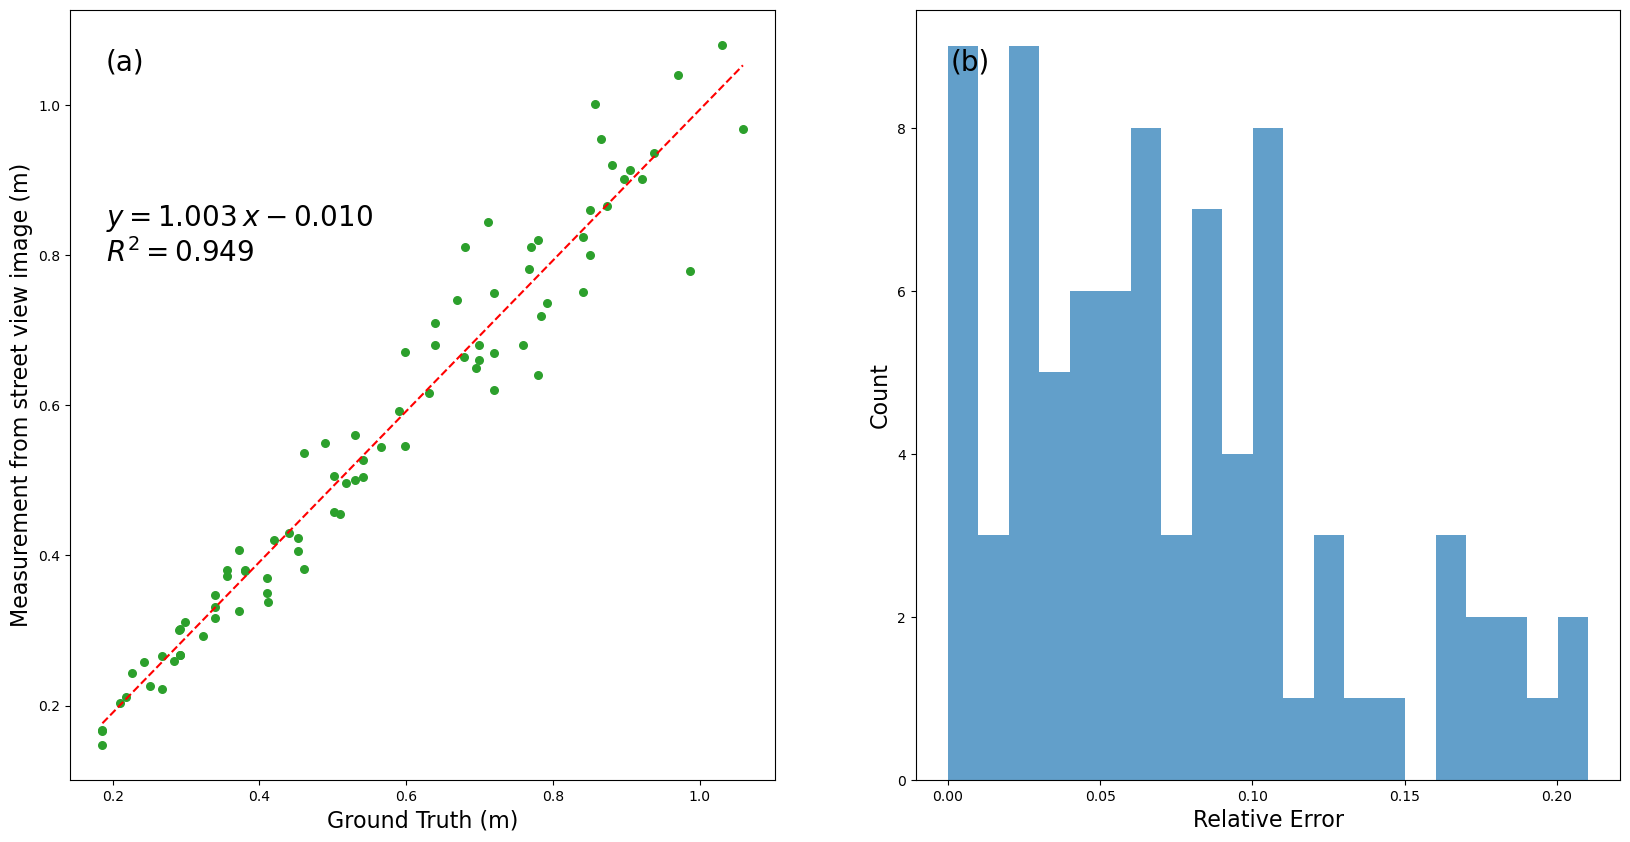

In [177]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def draw_r2_squared(ax2, x_true, y_observed):
    x_true = np.array(x_true).reshape((-1, 1))
    y_observed = np.array(y_observed).reshape((-1, 1))
    reg = LR().fit(x_true, y_observed)
    z = np.polyfit(x_true.ravel(), y_observed.ravel(), 1)
    p = np.poly1d(z)
    y_pred = p(x_true)
    R_squared = r2_score(y_observed, y_pred)
    # print()
    print("R squared:", R_squared)
    print("reg.coef_:", reg.coef_)
    text = f"$y={z[0]:0.3f}\:x{z[1]:+0.3f}$\n$R^2 = {R_squared:0.3f}$"
    ax2.scatter(x=x_true, y=y_observed, s=30, color="tab:green")
    ax2.text(0.05, 0.75, text, 
               transform=ax2.transAxes,
               fontsize=20,
               verticalalignment='top')
    
    # draw trend line
    line_ends = [min(x_true), max(x_true)]
    end_preds = p(line_ends)
    ax2.plot(line_ends, end_preds, 'r--')
    ax2.set_xlabel("Ground Truth (m)", fontsize=16)
    ax2.set_ylabel("Measurement from street view image (m)", fontsize=16)

fig, axs = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
draw_r2_squared(axs[0], added_estimated_gdf['diameter_m'], added_estimated_gdf['mean_diameter'])

# draw the error distribution as a histogram
# fig, axs = plt.subplots(figsize=(10, 10), row=1, ncols=1)
axs[1].hist(added_estimated_gdf['error_%'], bins=21, color='tab:blue', alpha=0.7)
axs[1].set_xlabel("Relative Error", fontsize=16)
axs[1].set_ylabel("Count", fontsize=16)

# add "(a)" and "(b)" labels to the subplots
axs[0].text(0.05, 0.95, "(a)",
              transform=axs[0].transAxes,
              fontsize=20,
              verticalalignment='top')      
axs[1].text(0.05, 0.95, "(b)",
              transform=axs[1].transAxes,
              fontsize=20,
              verticalalignment='top')    

In [178]:
added_estimated_gdf.query("mean_diameter > 0")['error_%'].max()

0.21029111381220936

<AxesSubplot: ylabel='Frequency'>

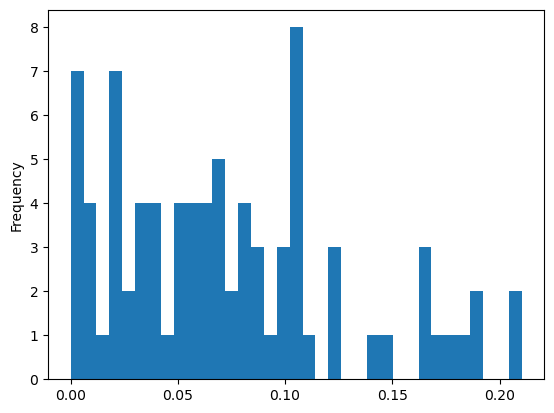

In [179]:
added_estimated_gdf.query("mean_diameter > 0")['error_%'].plot.hist(bins=35)

In [180]:
gdf.query("mean_diameter > 0")

NameError: name 'gdf' is not defined